# Project for data science coursera 

In [1]:
import yfinance as yf

tesla_data = yf.download('TSLA', start='2025-01-01', end='2025-09-14',period="1d")
tesla_data.reset_index(drop=True, inplace=True)
tesla_data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
0,379.279999,392.730011,373.040009,390.100006,109710700
1,410.440002,411.880005,379.450012,381.480011,95423300
2,411.049988,426.429993,401.700012,423.200012,85516500
3,394.359985,414.329987,390.000000,405.829987,75699500
4,394.940002,402.500000,387.399994,392.950012,73038800


In [7]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.quarterly_financials.T  


tesla_revenue = tesla_data[["Total Revenue"]].reset_index()
tesla_revenue.rename(columns={"index": "Date", "Total Revenue": "Revenue"}, inplace=True)

print(tesla_revenue.tail())

        Date        Revenue
2 2024-12-31  25707000000.0
3 2024-09-30  25182000000.0
4 2024-06-30  25500000000.0
5 2024-03-31            NaN
6 2023-12-31            NaN


In [ ]:
ticker = yf.Ticker("GME")
gme_data = ticker.history(period="1d", start="2024-01-01", end="2025-09-14")
gme_data.reset_index(inplace=True)

# Save to CSV for submission / upload
gme_data.to_csv("gme_data.csv", index=False)

# Display first five rows
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-01-02 00:00:00-05:00,17.250000,17.600000,16.580000,16.670000,4428000,0.0,0.0
1,2024-01-03 00:00:00-05:00,16.299999,16.830000,15.900000,16.690001,4193600,0.0,0.0
2,2024-01-04 00:00:00-05:00,16.510000,16.750000,16.309999,16.360001,2671500,0.0,0.0
3,2024-01-05 00:00:00-05:00,16.160000,16.520000,15.960000,15.960000,2619200,0.0,0.0
4,2024-01-08 00:00:00-05:00,15.780000,16.120001,15.700000,15.790000,3031100,0.0,0.0


        Date      Revenue
2 2025-01-31  919200000.0
3 2024-10-31  603100000.0
4 2024-07-31  549500000.0
5 2024-04-30          NaN
6 2024-01-31          NaN


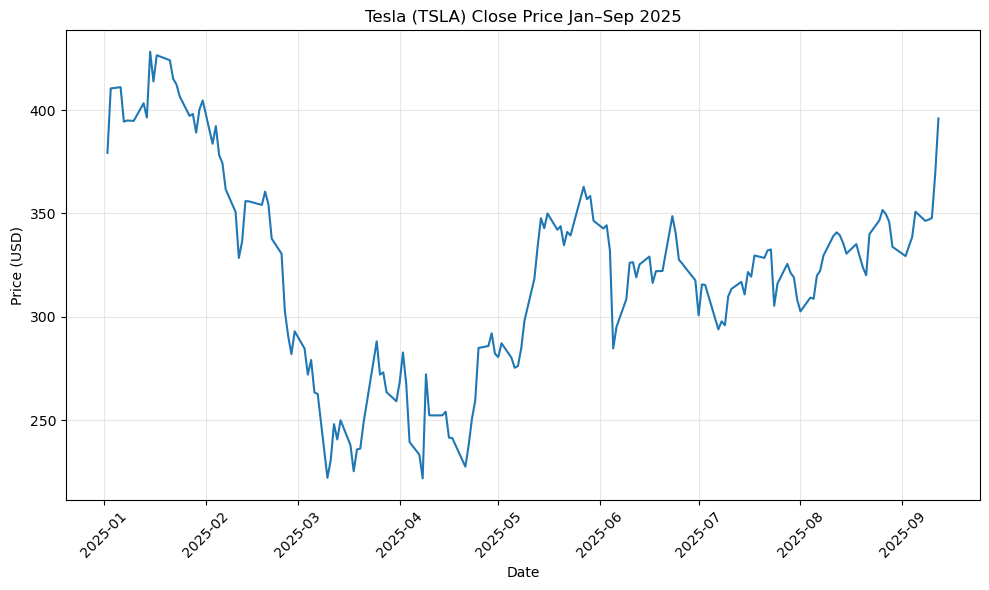

Saved plot to tesla_stock.png


In [ ]:
import matplotlib.pyplot as plt

def make_graph(df, title=""):

    if "Close" in df.columns:
        y = df["Close"]
    elif "Adj Close" in df.columns:
        y = df["Adj Close"]
    else:
        raise ValueError("DataFrame must contain 'Close' or 'Adj Close' column.")
    x = df["Date"]

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, color="tab:blue", lw=1.5)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.tight_layout()
    out_file = "tesla_stock.png"
    plt.savefig(out_file, dpi=150)
    plt.show()

stock_data = tesla.history(period="1d", start="2025-01-01", end="2025-09-14")

make_graph(stock_data, "Tesla (TSLA) Close Price Jan–Sep 2025")

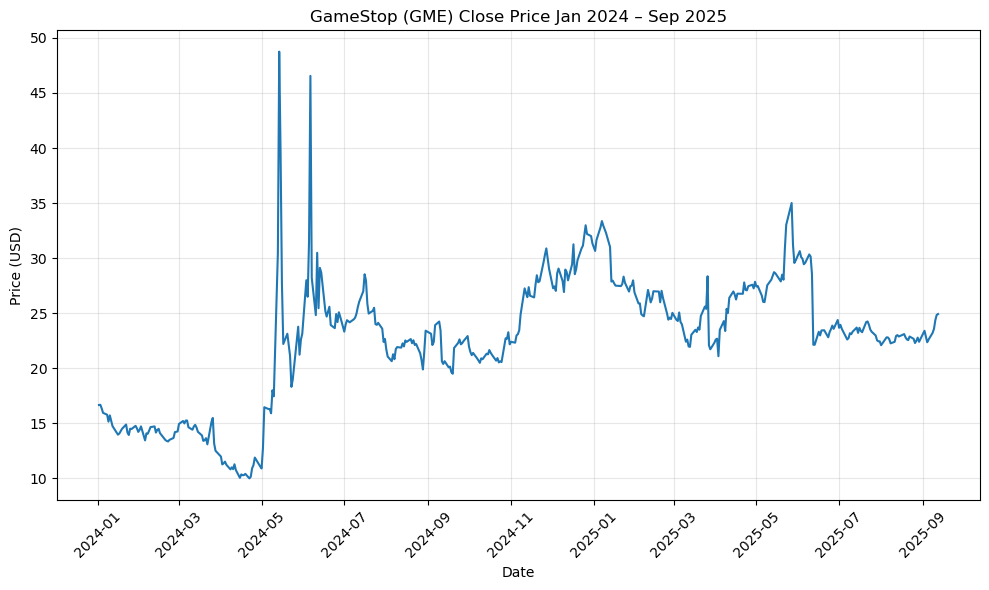

Saved plot to tesla_stock.png


In [ ]:
make_graph(gme_data, "GameStop (GME) Close Price Jan 2024 – Sep 2025")

